In [1]:
# Dependencies

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

In [2]:
#data frame for legal status and pop
hr_df = pd.read_csv("../Final Project/top5.csv")
hr_df.head()

,Reviewer_Nationality,Full_Review
0,Ireland,No real complaints the hotel was great great ...
1,Australia,Location was good and staff were ok It is cut...
2,UnitedKingdom,Great location in nice surroundings the bar a...
3,UnitedKingdom,The room is spacious and bright The hotel is ...
4,UnitedKingdom,Good location Set in a lovely park friendly s...


In [3]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326115 entries, 0 to 326114
Data columns (total 2 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Reviewer_Nationality  326115 non-null  object
 1   Full_Review           326115 non-null  object
dtypes: object(2)
memory usage: 5.0+ MB


In [4]:
X = hr_df["Full_Review"].values.astype("U")
y = hr_df["Reviewer_Nationality"]
print(X.shape, y.shape)

(326115,) (326115,)


In [5]:
X[0],y[0]

(' No real complaints the hotel was great great location surroundings rooms amenities and service Two recommendations however firstly the staff upon check in are very confusing regarding deposit payments and the staff offer you upon checkout to refund your original payment and you can make a new one Bit confusing Secondly the on site restaurant is a bit lacking very well thought out and excellent quality food for anyone of a vegetarian or vegan background but even a wrap or toasted sandwich option would be great Aside from those minor minor things fantastic spot and will be back when i return to Amsterdam No Negative',
 'Ireland')

In [6]:
print(hr_df["Reviewer_Nationality"].value_counts())

UnitedKingdom            244457
UnitedStatesofAmerica     35196
Australia                 21540
Ireland                   14746
UnitedArabEmirates        10176
Name: Reviewer_Nationality, dtype: int64


In [7]:
cv = CountVectorizer()
X = cv.fit_transform(X) # Fit the Data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer

In [9]:
# Function to calculate accuracy , confusion matrix, classification report
def cal_accuracy(y_test, y_pred): 
      
    print("""\nConfusion Matrix: \n""", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("\nAccuracy : \n", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("\nClassification Report : \n", 
    classification_report(y_test, y_pred))

In [10]:
# Function to calculate accuracy score
def model_accuracy(y_test, y_pred): 
        return accuracy_score(y_test,y_pred)*100

In [11]:
from sklearn.naive_bayes import MultinomialNB

In [12]:
# Naive Bayes Model
clf = MultinomialNB()
# Model Fit
clf.fit(X_train,y_train)
# Model Score
clf.score(X_test,y_test)
# Model Prediction
y_pred = clf.predict(X_test)
# Model Accuracy
cal_accuracy(y_test, y_pred)
NB_accuracy = model_accuracy(y_test, y_pred)


Confusion Matrix: 
 [[  652    15    19  5739   619]
 [   97    39    22  4541   194]
 [   75     8   200  2640   472]
 [  970   209   228 77426  1823]
 [  188    10    57  6576  4799]]

Accuracy : 
 77.23243323607575

Classification Report : 
                        precision    recall  f1-score   support

            Australia       0.33      0.09      0.14      7044
              Ireland       0.14      0.01      0.02      4893
   UnitedArabEmirates       0.38      0.06      0.10      3395
        UnitedKingdom       0.80      0.96      0.87     80656
UnitedStatesofAmerica       0.61      0.41      0.49     11630

             accuracy                           0.77    107618
            macro avg       0.45      0.31      0.32    107618
         weighted avg       0.70      0.77      0.72    107618



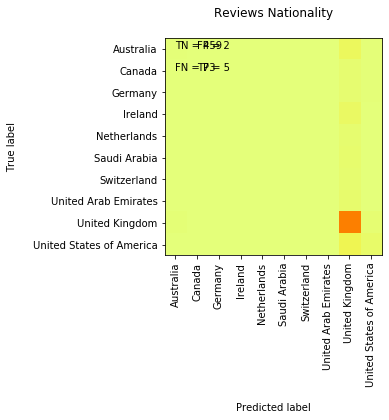

In [22]:
# Visualization of Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Australia','Canada','Germany','Ireland','Netherlands','Saudi Arabia', 'Switzerland','United Arab Emirates','United Kingdom','United States of America']
plt.title('Reviews Nationality\n')
plt.ylabel('True label\n')
plt.xlabel('\nPredicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [23]:
#Random FOrest
from sklearn import tree

In [24]:
# Decision Tree Model
tree_clf = tree.DecisionTreeClassifier()
# Model Fit
tree_clf = tree_clf.fit(X_train,y_train)
# Model score
tree_clf.score(X_test, y_test)
# Model Predict
y_tree_predicted = tree_clf.predict(X_test)
# Model Accurarcy
cal_accuracy(y_test, y_tree_predicted)
DT_accuracy = model_accuracy(y_test, y_tree_predicted)


Confusion Matrix: 
 [[  573   123   101   231   108   104   135   123  4980   597]
 [  156    61    58    66    54    48    57    44  1692   380]
 [  137    43    94    59    97    72   101    75  1713   302]
 [  248    73    71   187    85    72    96    83  3721   301]
 [  116    58    90    88   155    68    76    70  1883   283]
 [  102    39    67    41    36   187    58   134  2084   183]
 [  140    58    87    80    99    63    93    84  1859   258]
 [  124    59    70    84    71   146    63   132  2387   258]
 [ 3374  1007   975  2329  1060   984  1022  1179 64644  4312]
 [  640   319   239   313   262   204   243   248  7129  2154]]

Accuracy : 
 55.97134214819126

Classification Report : 
                        precision    recall  f1-score   support

            Australia       0.10      0.08      0.09      7075
               Canada       0.03      0.02      0.03      2616
              Germany       0.05      0.03      0.04      2693
              Ireland       0.05    

In [ ]:
# Visualization of Confusion Matrix
cm = confusion_matrix(y_test, y_rf_predicted)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Reviews - Positive or Negative - Confusion Matrix - Test Data\n')
plt.ylabel('True label\n')
plt.xlabel('\nPredicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [ ]:
##KNN

In [25]:

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# KNN Model
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    # Knn Model
    knn = KNeighborsClassifier(n_neighbors=k)
    # Model Fit
    knn.fit(X_train, y_train)
    # Model score
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [ ]:
# Note that k: 29 provides the best accuracy where the classifier starts to stablize
# Model
knn = KNeighborsClassifier(n_neighbors=29)
# Model Fit
knn.fit(X_train, y_train)
print("K= 29")
# Model Predict
y_knn_predicted = knn.predict(X_test)
# Model Accurarcy
cal_accuracy(y_test, y_knn_predicted)
KNN_accuracy = model_accuracy(y_test, y_knn_predicted)

In [ ]:
###LR

In [ ]:
# Logistic Regression Model
lr = LogisticRegression(random_state= 42)
# Model Fit
lr = lr.fit(X_train, y_train)
# Model Score
lr.score(X_test, y_test)
# Model Predict
y_lr_predicted = lr.predict(X_test)
# Model Accurarcy
cal_accuracy(y_test, y_lr_predicted)
LR_accuracy = model_accuracy(y_test, y_lr_predicted)